Extracting EDF parameters from c:\Users\maxeg\EEG\EDFFiles\aaaaaaaa_s001_t000.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 323839  =      0.000 ...  1264.996 secs...
Setting channel interpolation method to {'eeg': 'spline'}.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1691 samples (6.605 s)



C:\Users\maxeg\AppData\Local\Temp\ipykernel_13228\1753716086.py:43: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  RawEEGDataFile.interpolate_bads();


Overwriting existing file.
Writing c:\Users\maxeg\EEG\OutputFiles\filtered_aaaaaaaa_s001_t000.fif
    Writing channel names to FIF truncated to 15 characters with remapping


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
C:\Users\maxeg\AppData\Local\Temp\ipykernel_13228\1753716086.py:56: RuntimeWarning: This filename (c:\Users\maxeg\EEG\OutputFiles\filtered_aaaaaaaa_s001_t000.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  BPEEGDataFile.save(OutputFile, overwrite=True)


Closing c:\Users\maxeg\EEG\OutputFiles\filtered_aaaaaaaa_s001_t000.fif
[done]
Using matplotlib as 2D backend.


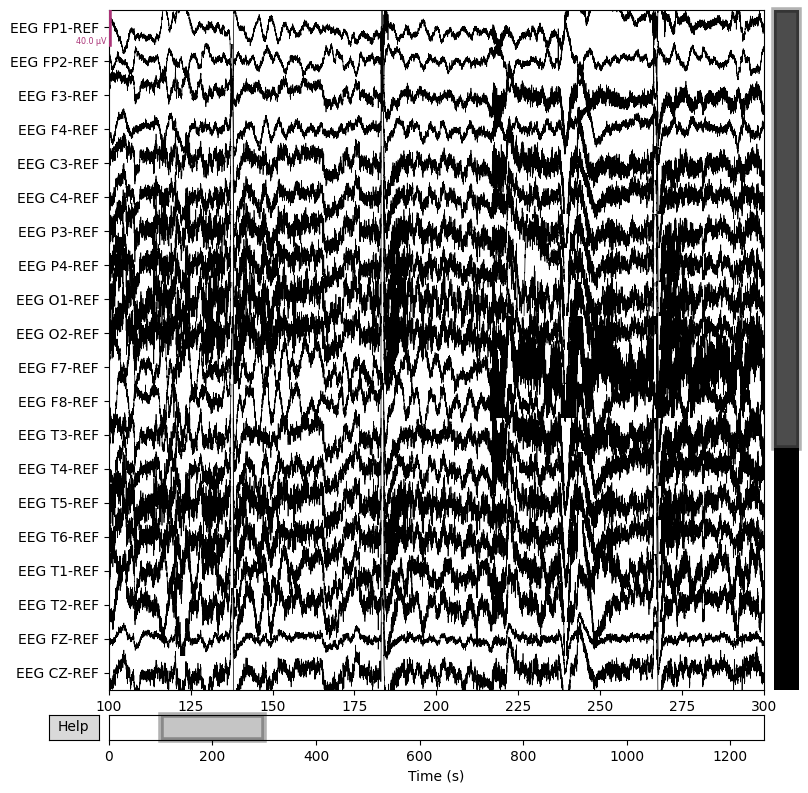

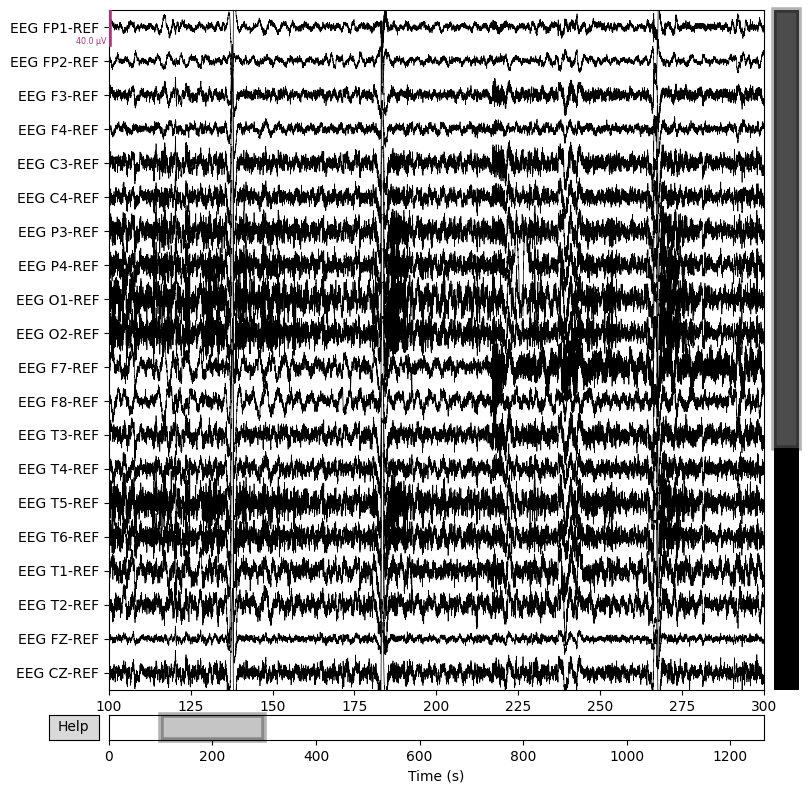

Effective window size : 8.000 (s)
Effective window size : 8.000 (s)
Finished and saved file EDFFiles\aaaaaaaa_s001_t000.edf to OutputFiles\filtered_aaaaaaaa_s001_t000.fif
Finished and saved PSD data to OutputFiles\PSD_aaaaaaaa_s001_t000.csv
Extracting EDF parameters from c:\Users\maxeg\EEG\EDFFiles\aaaaaahs_s001_t001.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 63999  =      0.000 ...   255.996 secs...
Setting channel interpolation method to {'eeg': 'spline'}.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidt

C:\Users\maxeg\AppData\Local\Temp\ipykernel_13228\1753716086.py:43: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  RawEEGDataFile.interpolate_bads();
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
C:\Users\maxeg\AppData\Local\Temp\ipykernel_13228\1753716086.py:56: RuntimeWarning: This filename (c:\Users\maxeg\EEG\OutputFiles\filtered_aaaaaahs_s001_t001.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  BPEEGDataFile.save(OutputFile, overwrite=True)


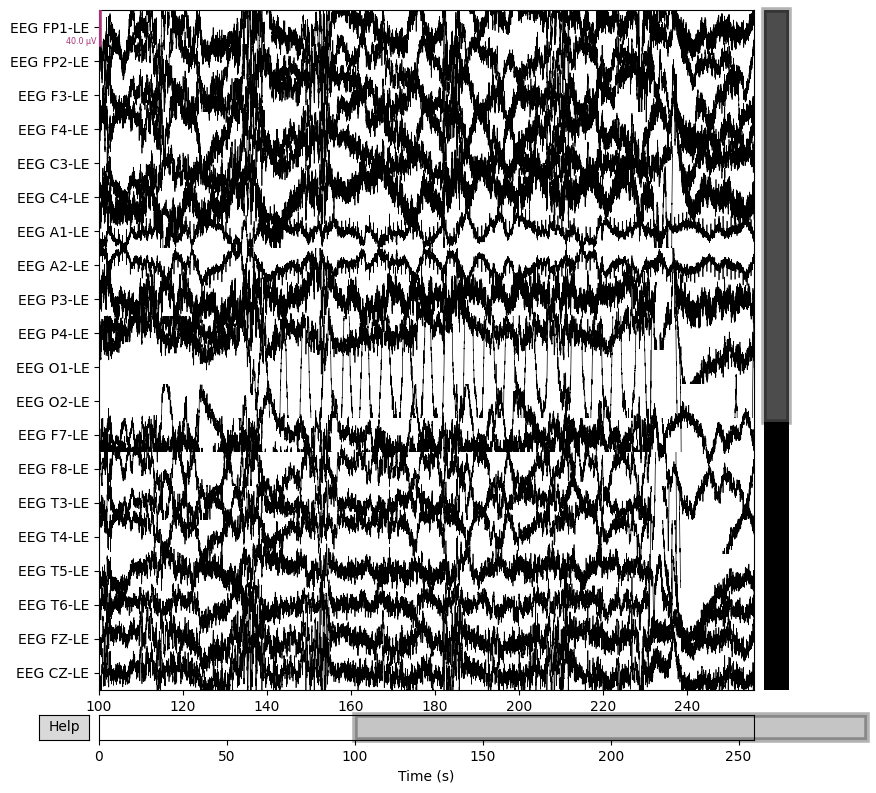

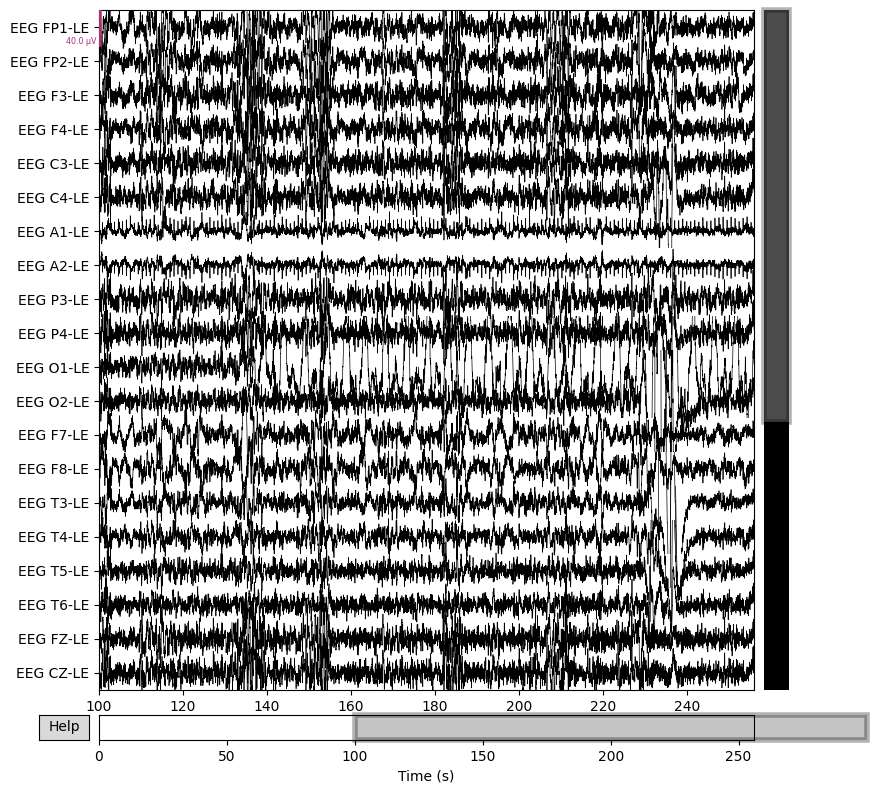

Effective window size : 8.192 (s)
Effective window size : 8.192 (s)
Finished and saved file EDFFiles\aaaaaahs_s001_t001.edf to OutputFiles\filtered_aaaaaahs_s001_t001.fif
Finished and saved PSD data to OutputFiles\PSD_aaaaaahs_s001_t001.csv


C:\Users\maxeg\AppData\Local\Temp\ipykernel_13228\1753716086.py:77: UserWarning: Zero value in spectrum for channel PHOTIC PH
  AlphaComp = EEGFile.compute_psd(method='welch', fmin=8, fmax=12, tmin=None, tmax=None, picks='eeg', exclude=(), proj=False, remove_dc=True, reject_by_annotation=True, n_jobs=1, verbose=None)
C:\Users\maxeg\AppData\Local\Temp\ipykernel_13228\1753716086.py:80: UserWarning: Zero value in spectrum for channel PHOTIC PH
  DeltaComp = EEGFile.compute_psd(method='welch', fmin=0.5, fmax=4, tmin=None, tmax=None, picks='eeg', exclude=(), proj=False, remove_dc=True, reject_by_annotation=True, n_jobs=1, verbose=None)
C:\Users\maxeg\AppData\Local\Temp\ipykernel_13228\1753716086.py:90: RuntimeWarning: invalid value encountered in divide
  AlDeRat = AlphaMean / DeltaMean


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas 
import ipywidgets
import mne
import os
import boto3
import sagemaker
from sagemaker import get_execution_role
from botocore.exceptions import NoCredentialsError
from mne import Epochs, compute_covariance, find_events, make_ad_hoc_cov
from mne.datasets import sample
from mne.preprocessing import annotate_movement, compute_average_dev_head_t, annotate_muscle_zscore, find_eog_events
from mne.datasets.brainstorm import bst_auditory
from mne.io import read_raw_ctf, read_raw_edf
from mne.viz import plot_alignment, set_3d_view
from mne.simulation import (
    add_ecg,
    add_eog,
    add_noise,
    simulate_raw,
    simulate_sparse_stc,
)


EDFInputPath = 'EDFFiles'
EDFOutputPath = 'OutputFiles'


def AllEDFProcess(EDFFolder):
    if not os.path.exists(EDFOutputPath):
        os.makedirs(EDFOutputPath)
    
    for FileName in os.listdir(EDFFolder):
        if FileName.endswith('.edf'):
            EDFFilePath = os.path.join(EDFFolder, FileName)
            EDFProcess(EDFFilePath)
            
            

def EDFProcess(EDFFilePath):
    RawEEGDataFile = mne.io.read_raw_edf(EDFFilePath, preload=True)
    RawEEGDataFile.interpolate_bads();

    BPEEGDataFile = BPFilter(RawEEGDataFile)
    
    # EOGDataFile = find_eog_events(BPEEGDataFile, ch_name=["EEG FP1-REF", "EEG FZ-REF"])
    # EOGOnset = EOGDataFile[:, 0] / BPEEGDataFile.info["sfreq"] - 0.25
    # EOGDuration = [0.5] * len(EOGDataFile)
    # EOGDescr = ["bad blink"] * len(EOGDataFile)
    # blink_annot = mne.Annotations(EOGOnset, EOGDuration, EOGDescr, orig_time=BPEEGDataFile.info["meas_date"])
    # BPEEGDataFile.set_annotations(blink_annot)

    OutputFileName = f"filtered_{os.path.splitext(os.path.basename(EDFFilePath))[0]}.fif"
    OutputFile = os.path.join(EDFOutputPath, OutputFileName)
    BPEEGDataFile.save(OutputFile, overwrite=True)
    RawEEGDataFile.plot(duration=200, start=100)
    BPEEGDataFile.plot(duration=200, start=100)
    
    ADRatioDF = AlphaDeltaProcess(BPEEGDataFile)
    
    PSDOutputFileName = f"PSD_{os.path.splitext(os.path.basename(EDFFilePath))[0]}.csv"
    PSDOutputFile = os.path.join(EDFOutputPath, PSDOutputFileName)
    ADRatioDF.to_csv(PSDOutputFile, index=False)


    print(f"Finished and saved file {EDFFilePath} to {OutputFile}")
    print(f"Finished and saved PSD data to {PSDOutputFile}")

def BPFilter(RawEEGDataFile):
    BPEEGDataFile = RawEEGDataFile.copy().filter(l_freq=0.5, h_freq=40.0, fir_design='firwin')
    return BPEEGDataFile


## ALPHA DELTA PSD ANALYSIS AND DATA FRAMING ##
def AlphaDeltaProcess(EEGFile):
    AlphaComp = EEGFile.compute_psd(method='welch', fmin=8, fmax=12, tmin=None, tmax=None, picks='eeg', exclude=(), proj=False, remove_dc=True, reject_by_annotation=True, n_jobs=1, verbose=None)
    AlphaPSD, AlphaFreq = AlphaComp.get_data(return_freqs=True)
    #display(AlphaComp)
    DeltaComp = EEGFile.compute_psd(method='welch', fmin=0.5, fmax=4, tmin=None, tmax=None, picks='eeg', exclude=(), proj=False, remove_dc=True, reject_by_annotation=True, n_jobs=1, verbose=None)
    DeltaPSD, DeltaFreq = DeltaComp.get_data(return_freqs=True)
    #DeltaComp.plot()
    #raw_csd = mne.preprocessing.compute_current_source_density(RawEEGDataFile);

    ChanLab = EEGFile.ch_names

    AlphaMean = AlphaPSD.mean(axis=1)
    DeltaMean = DeltaPSD.mean(axis=1)

    AlDeRat = AlphaMean / DeltaMean

    PSDRatDF = pandas.DataFrame({'Channel': ChanLab,'Alpha Power': AlphaMean,'Delta Power': DeltaMean,'Alpha/Delta Ratio': AlDeRat})

    #display(PSDRatDF)
    return PSDRatDF



AllEDFProcess(EDFInputPath)

# RawEEGDataFile = mne.io.read_raw_edf("aaaaaaaa_s001_t000.edf", preload=True)
# raw_data = RawEEGDataFile.get_data()
# info = RawEEGDataFile.info
# channels = RawEEGDataFile.ch_names

# RawEEGDataFile = RawEEGDataFile.pick(picks=["eeg", "eog", "ecg", "stim"]).load_data();
# RawEEGDataFile.interpolate_bads();
# RawEEGDataFile.get_data().shape


#display(raw_data)
#display(info)

# data_path = sample.data_path()
# subjects_dir = data_path / "sample"
# meg_path = data_path / "MEG" / "sample"
# raw_fname = meg_path / "sample_audvis_raw.fif"
# fwd_fname = meg_path / "sample_audvis-meg-eeg-oct-6-fwd.fif"

# Load real data as the template
#RawEEGDataFile = mne.io.read_raw_fif(raw_fname, preload=True);
#RawEEGDataFile.set_eeg_reference(projection=True);
# RawEEGDataFile = RawEEGDataFile.pick(picks=["eeg", "eog", "ecg", "stim"]).load_data();
# RawEEGDataFile.interpolate_bads();
# RawEEGDataFile.get_data().shape
# EEGChannelNum = input("Please input the number of channels:")
#Freq = float(input("Please input sample refresh rate in Hz:"))
# RawEEGDataFile = input("Please input the EEG data file name:")

Freq = 256
EEGChannelNum = 31
ChannelArr = np.arange(1, EEGChannelNum + 1)

#raw_csd.plot();

#raw.compute_psd().plot(picks="data", exclude="bads", amplitude=False);

#raw_csd.compute_psd().plot(picks="data", exclude="bads", amplitude=False);


In [ ]:
# ## BANDPASS FILTERING OF RAW DATA ##

# BPEEGDataFile = RawEEGDataFile.copy().filter(l_freq=0.5, h_freq=40.0, fir_design='firwin')
# #RawEEGDataFile.notch_filter([60, 120])

# RawEEGDataFile.plot()
# BPEEGDataFile.plot()

# RawDF = RawEEGDataFile.to_data_frame()
# display(RawDF)
# BPDF = BPEEGDataFile.to_data_frame()
# display(BPDF)

In [ ]:
## ALPHA DELTA PSD ANALYSIS AND DATA FRAMING ##
def AlphaDeltaProcess(EEGFile):
    AlphaComp = EEGFile.compute_psd(method='welch', fmin=8, fmax=12, tmin=None, tmax=None, picks='eeg', exclude=(), proj=False, remove_dc=True, reject_by_annotation=True, n_jobs=1, verbose=None)
    AlphaPSD, AlphaFreq = AlphaComp.get_data(return_freqs=True)
    #display(AlphaComp)
    DeltaComp = EEGFile.compute_psd(method='welch', fmin=0.5, fmax=4, tmin=None, tmax=None, picks='eeg', exclude=(), proj=False, remove_dc=True, reject_by_annotation=True, n_jobs=1, verbose=None)
    DeltaPSD, DeltaFreq = DeltaComp.get_data(return_freqs=True)
    #DeltaComp.plot()
    #raw_csd = mne.preprocessing.compute_current_source_density(RawEEGDataFile);

    AlphaMean = AlphaPSD.mean(axis=1)
    DeltaMean = DeltaPSD.mean(axis=1)

    AlDeRat = AlphaMean / DeltaMean

    PSDRatDF = pandas.DataFrame({'Channel': ChannelArr,'Alpha Power': AlphaMean,'Delta Power': DeltaMean,'Alpha/Delta Ratio': AlDeRat})

    #display(PSDRatDF)
    return PSDRatDF

In [ ]:
from mne.viz import plot_alignment, set_3d_view
trans = mne.read_trans(meg_path / 'sample_audvis_raw-trans.fif')
#raw = mne.io.read_raw_fif(meg_path / 'sample_audvis_raw.fif')

# Plot electrode locations on scalp
fig = plot_alignment(RawEEGDataFile.info, trans, subject='sample', dig=False,
                     eeg=['original', 'projected'], meg=[],
                     coord_frame='head', subjects_dir=subjects_dir)

# Set viewing angle
set_3d_view(figure=fig, azimuth=135, elevation=80)